# Sparks Foundation- Internship

# Task-6 : Prediction using Decision Tree Algorithm

To create the decision tree classifier and visualize it graphically.

# Author : Ashwini Jotiba Patole

In [1]:
#To import the required libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split  #For splitting the data
from sklearn.tree import DecisionTreeClassifier  #Since target variable is categorical
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
#To import the dataset
iris=pd.read_csv("Iris (2).csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
#The Id column is of no use for the classification so drop it
iris.drop(["Id"],inplace=True,axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
#To get the value count of target variable "Species"
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [21]:
#To code the categorical target variable using LabelEncoder
label_encoder=preprocessing.LabelEncoder()
iris.Species=label_encoder.fit_transform(iris.Species)
iris.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [22]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now the target variable is converted to integers so that it is easy for further analysis.

In [24]:
iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

So there are no any null values present in the dataset.

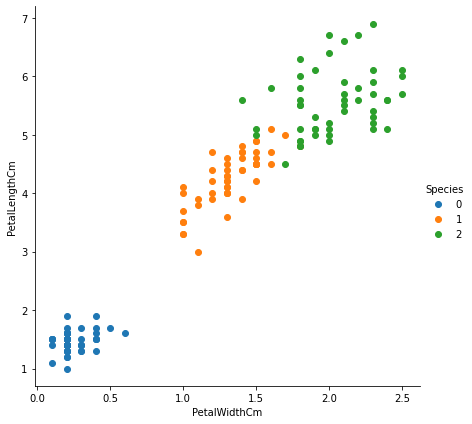

In [27]:
#To visualize the data by Scatterplot
sns.FacetGrid(iris,hue="Species",size=6).map(plt.scatter,"PetalWidthCm","PetalLengthCm").add_legend()

From the plot it is observed that the class 0 is completely classifiable but the class1 and class2 are mixed .

In [28]:
#To split the dataset into the target and independent variables
x=iris.iloc[:,0:4] #Independent variables excluding target
y=iris.iloc[:,4]   #Dependent i.e. the target varaible
x
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [30]:
#Train Test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
x_train


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
62,6.0,2.2,4.0,1.0
23,5.1,3.3,1.7,0.5
26,5.0,3.4,1.6,0.4
48,5.3,3.7,1.5,0.2
2,4.7,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
12,4.8,3.0,1.4,0.1
50,7.0,3.2,4.7,1.4
7,5.0,3.4,1.5,0.2


In [31]:
y_train

62    1
23    0
26    0
48    0
2     0
     ..
71    1
12    0
50    1
7     0
70    1
Name: Species, Length: 120, dtype: int32

In [32]:
y_train.value_counts()

0    42
2    40
1    38
Name: Species, dtype: int64

In [33]:
#Building Decision Tree Classifier using Entropy Criteira 
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(125.55000000000001, 190.26, 'X[2] <= 2.45\nentropy = 1.584\nsamples = 120\nvalue = [42, 38, 40]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 78\nvalue = [0, 38, 40]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.95\nentropy = 0.527\nsamples = 42\nvalue = [0, 37, 5]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.183\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\nentropy = 0.183\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(209.25, 27.180000000000007, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

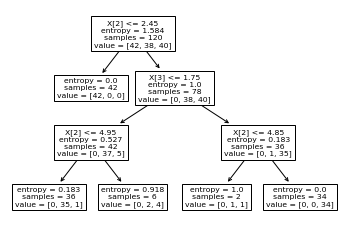

In [34]:
#Plot the decision tree
tree.plot_tree(model)

In [36]:
#Creating the feature names and again plot it
fn=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']  #Independent features
cn=['setosa','versicolor','virginica']   #Dependent features

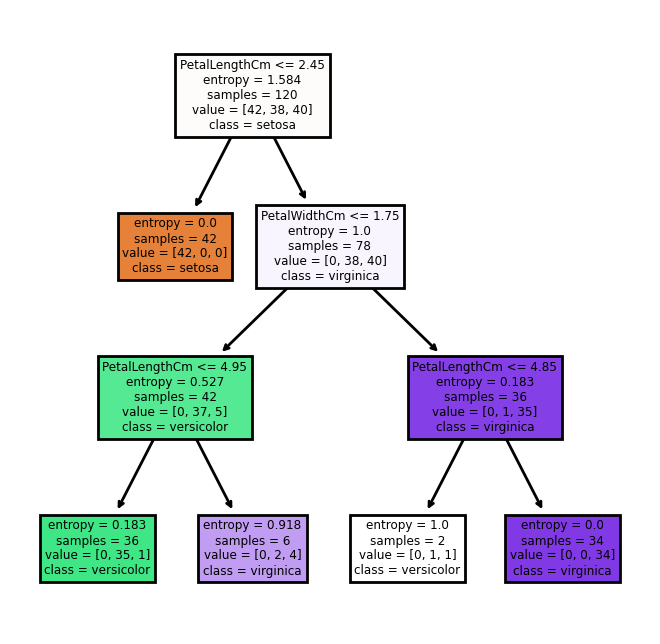

In [39]:
#To plot the decision tree
fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=200)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

The root node with the highest entropy of 1.584 is the PetalLengthCm attribute, the first class setosa is completely classified nextly the virginica class and the versicolor are classified.

In [40]:
#Predicting on the data
preds=model.predict(x_test)
pd.Series(preds).value_counts()

1    13
2     9
0     8
dtype: int64

In [43]:
y_test
y_test.value_counts()

1    12
2    10
0     8
Name: Species, dtype: int64

In [44]:
pd.crosstab(y_test,preds)   #It gives a table to understand correct and wrong predictions.

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,1,9


From the above table 1 class is missclassified by the model.

In [45]:
#Accuracy of the model
np.mean(preds==y_test)

0.9666666666666667

The decision tree classifier provides an accuracy of 96.67% for the prediction of the Species.

So now when any test data is provided for the classifier it would able to predict the correct class accordingly.